In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("dataset_match.csv")
df.head()

,dataset,match_score
0,sentiment,0.172992
1,ghc,0.402759
2,sbic,0.369747
3,schem5labels,0.458734
4,unhealthy,0.362000


In [ ]:
df.shape

(5, 2)

In [ ]:
df = df.dropna()

In [ ]:
dataset_names = df['dataset'].to_list()
dataset_names

['sentiment', 'ghc', 'sbic', 'schem5labels', 'unhealthy']

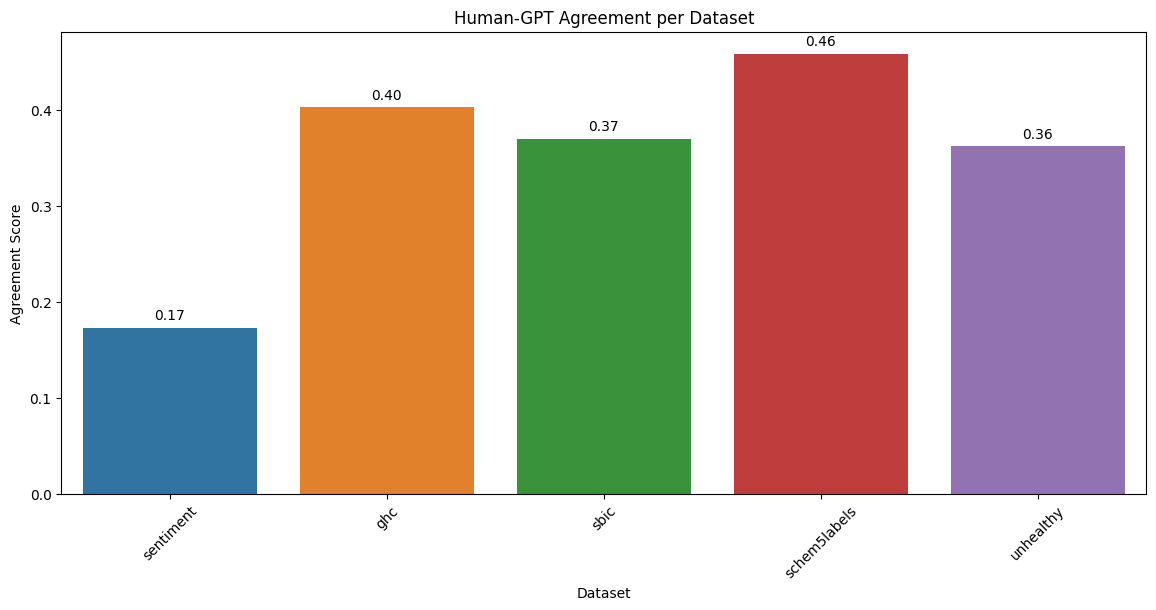

In [ ]:
# Plotting

plt.figure(figsize=(14, 6))
barplot = sns.barplot(x='dataset', y='match_score', data=df)

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Show the plot
plt.savefig('human-vs-gpt-plot.pdf',format='pdf')
plt.show()

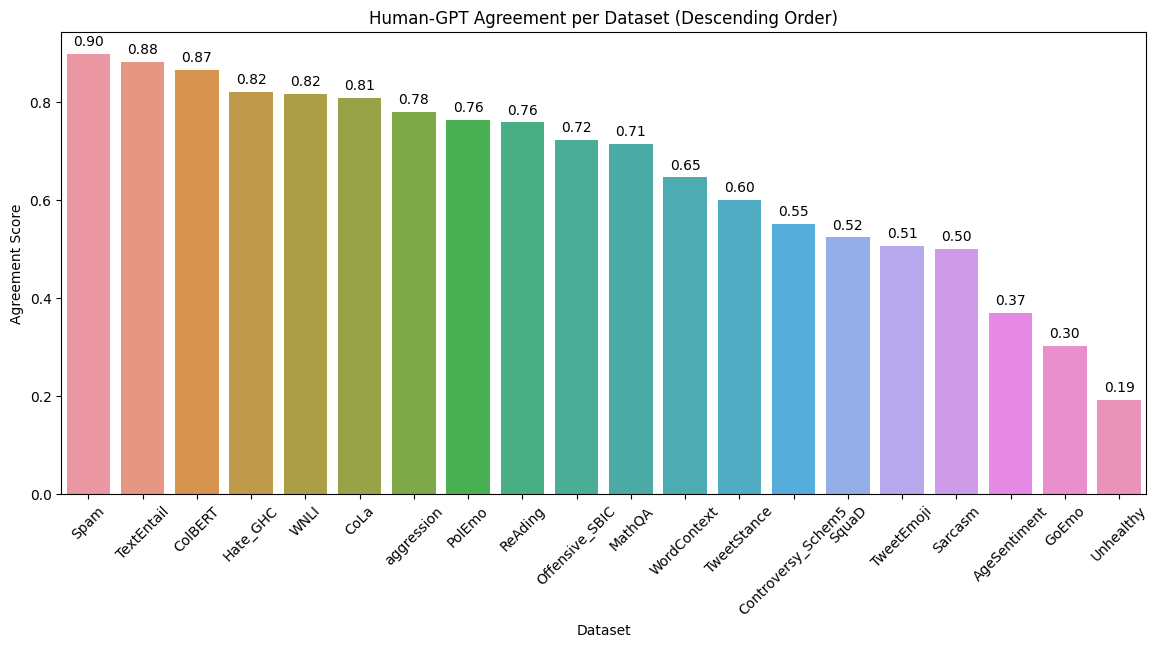

In [ ]:
df_sorted = df.sort_values('human_gpt_agreement', ascending=False)

# Replotting with sorted data
plt.figure(figsize=(14, 6))
barplot = sns.barplot(x='dataset', y='human_gpt_agreement', data=df_sorted)

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset (Descending Order)')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

# Show the plot
plt.show()

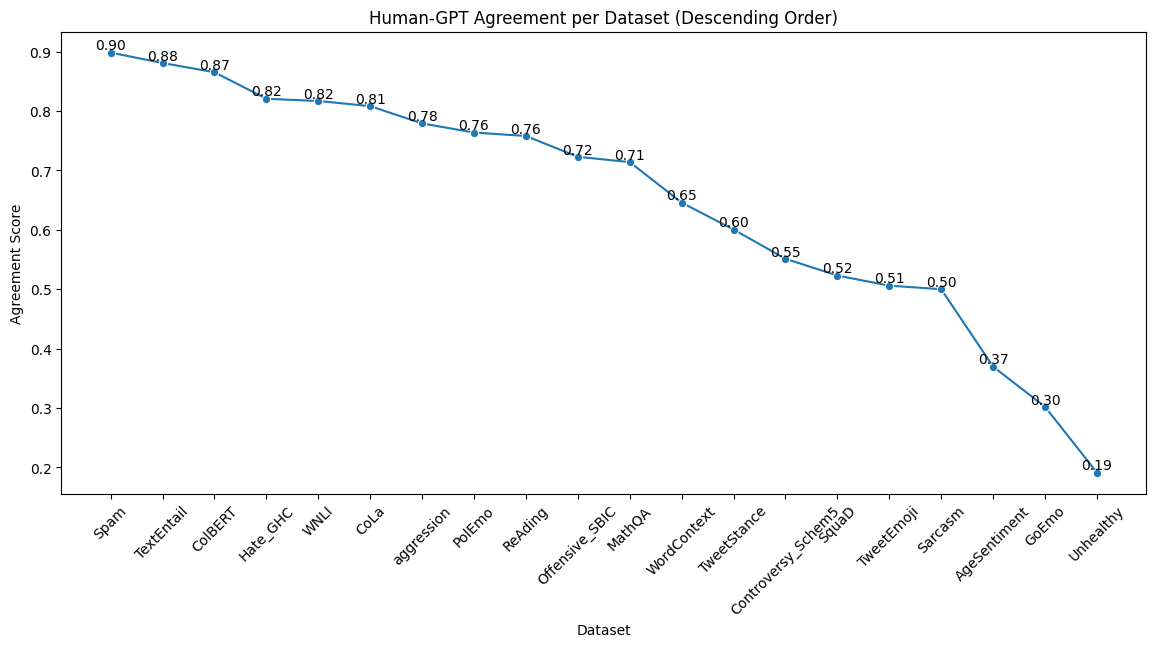

In [ ]:
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_sorted, marker='o')

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset (Descending Order)')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each point
for x, y in zip(df_sorted['dataset'], df_sorted['human_gpt_agreement']):
    plt.text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.show()

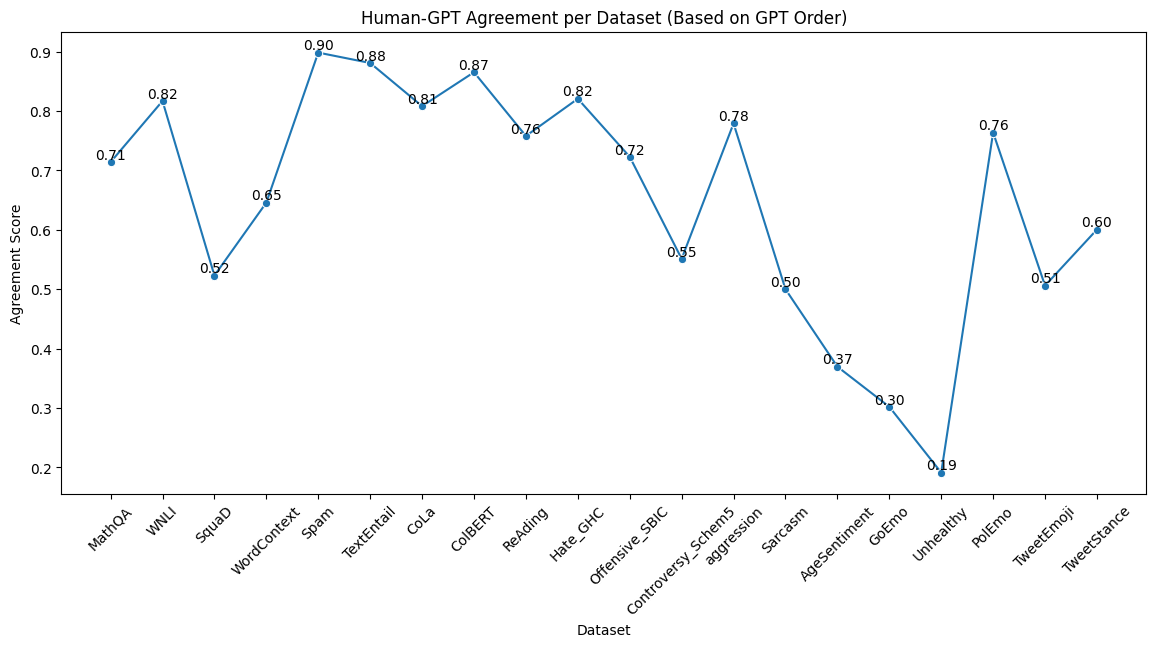

In [ ]:
df_sorted_by_gpt_order = df.sort_values('GPT_order_title', ascending=True)

# Replotting with data sorted by GPT order
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_sorted_by_gpt_order, marker='o')

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset (Based on GPT Order)')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each point
for x, y in zip(df_sorted_by_gpt_order['dataset'], df_sorted_by_gpt_order['human_gpt_agreement']):
    plt.text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.show()

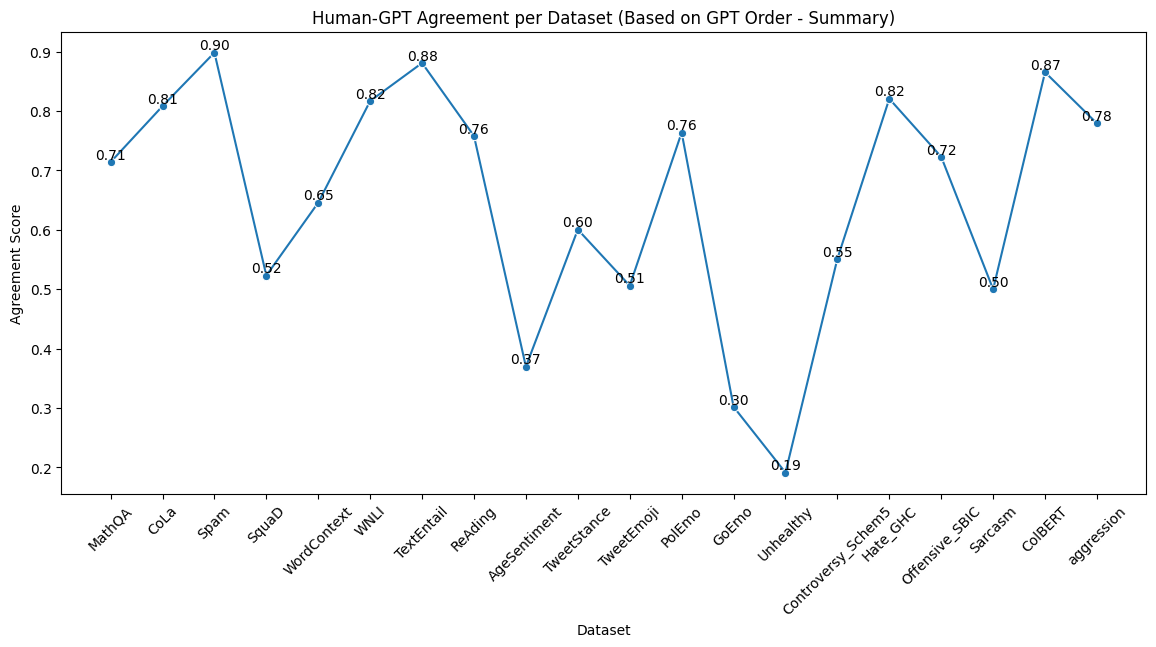

In [ ]:
df_sorted_by_gpt_order = df.sort_values('GPT_order_summary', ascending=True)

# Replotting with data sorted by GPT order
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_sorted_by_gpt_order, marker='o')

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset (Based on GPT Order - Summary)')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each point
for x, y in zip(df_sorted_by_gpt_order['dataset'], df_sorted_by_gpt_order['human_gpt_agreement']):
    plt.text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.show()

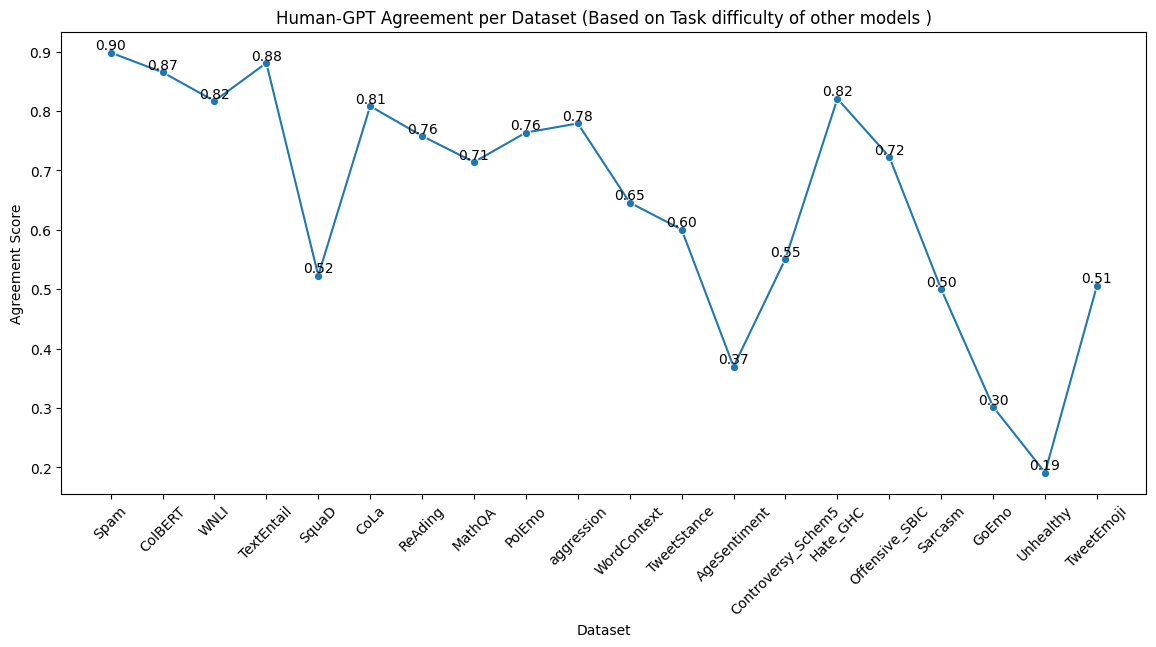

In [ ]:
df_sorted_by_task = df.sort_values('Model_Task_difficulty', ascending=True)

# Replotting with data sorted by GPT order
plt.figure(figsize=(14, 6))
lineplot = sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_sorted_by_task, marker='o')

# Adding title and labels
plt.title('Human-GPT Agreement per Dataset (Based on Task difficulty of other models )')
plt.xlabel('Dataset')
plt.ylabel('Agreement Score')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding the score on top of each point
for x, y in zip(df_sorted_by_gpt_order['dataset'], df_sorted_by_gpt_order['human_gpt_agreement']):
    plt.text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.show()

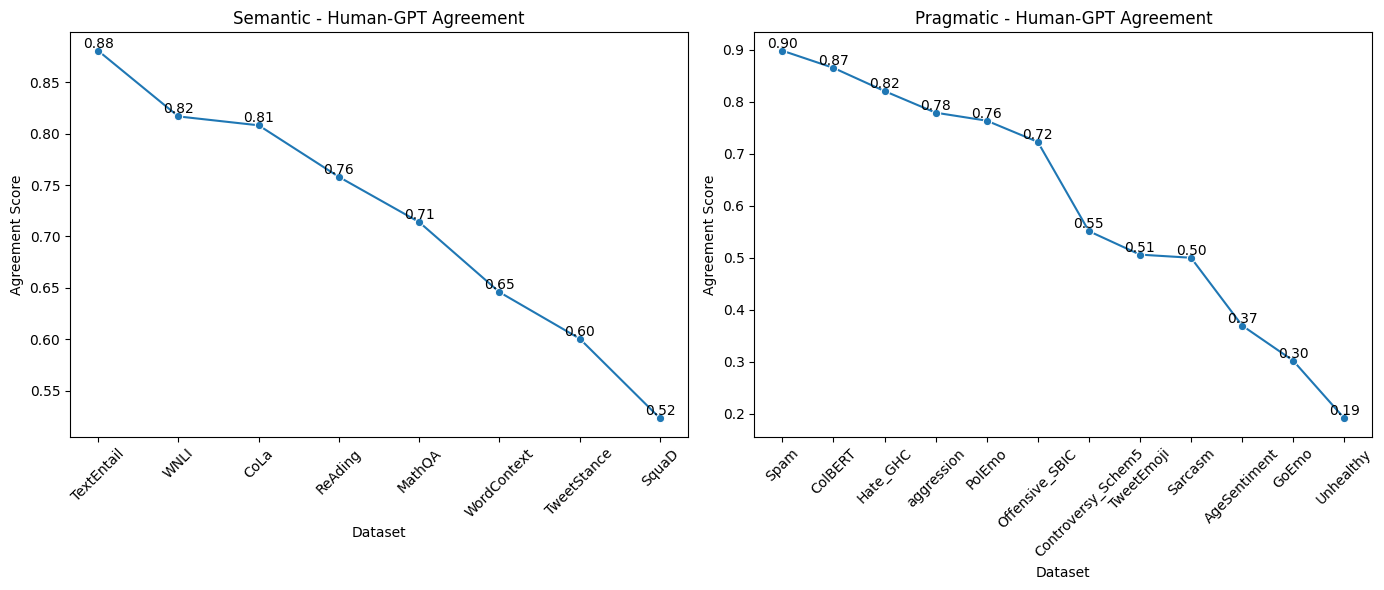

In [ ]:
# Filter the DataFrame for 'semantic' and 'pragmatic' tags
df_semantic = df[df['tag'] == 'semantic']
df_pragmatic = df[df['tag'] == 'pragmatic']

# Sorting if needed (assuming based on 'human_gpt_agreement' in descending order)
df_semantic_sorted = df_semantic.sort_values(by='human_gpt_agreement', ascending=False)
df_pragmatic_sorted = df_pragmatic.sort_values(by='human_gpt_agreement', ascending=False)

# Creating subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting 'semantic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_semantic_sorted, marker='o', ax=ax[0])
ax[0].set_title('Semantic - Human-GPT Agreement')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Agreement Score')
ax[0].tick_params(axis='x', rotation=45)

# Adding score text for semantic plot
for x, y in zip(df_semantic_sorted['dataset'], df_semantic_sorted['human_gpt_agreement']):
    ax[0].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Plotting 'pragmatic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_pragmatic_sorted, marker='o', ax=ax[1])
ax[1].set_title('Pragmatic - Human-GPT Agreement')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Agreement Score')
ax[1].tick_params(axis='x', rotation=45)

# Adding score text for pragmatic plot
for x, y in zip(df_pragmatic_sorted['dataset'], df_pragmatic_sorted['human_gpt_agreement']):
    ax[1].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

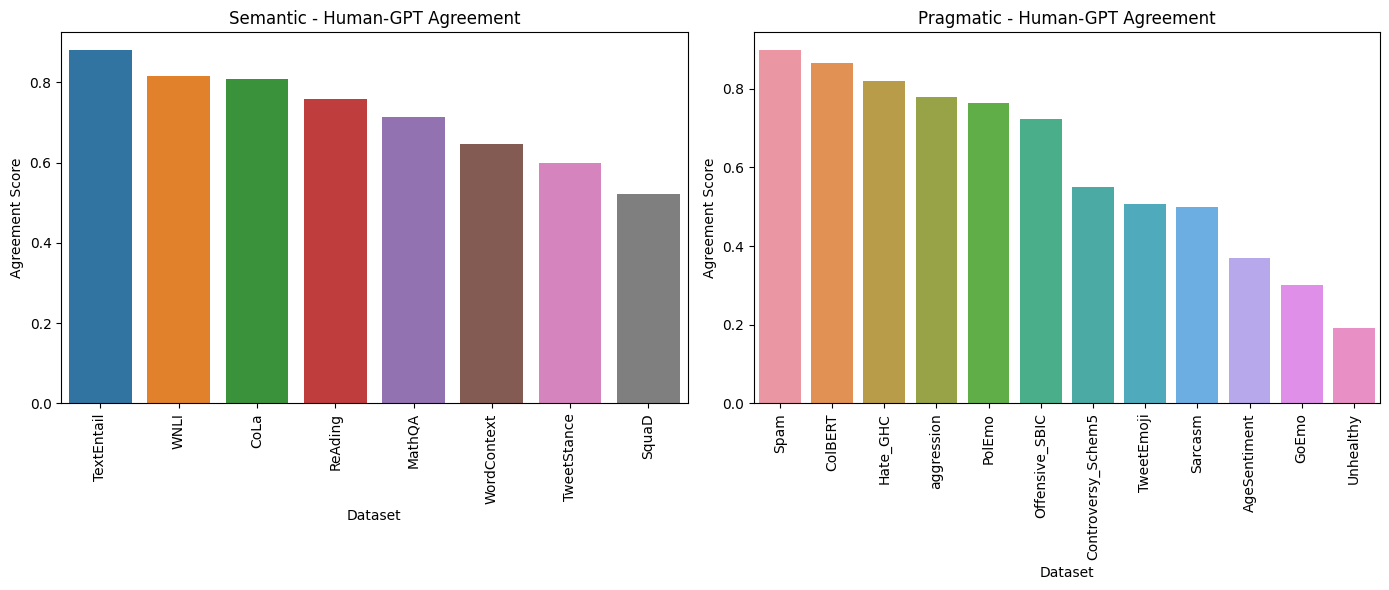

In [ ]:
# Assuming df_semantic_sorted and df_pragmatic_sorted are the sorted DataFrames
# Creating subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Semantic Barplot
sns.barplot(x='dataset', y='human_gpt_agreement', data=df_semantic_sorted, ax=ax[0])
ax[0].set_title('Semantic - Human-GPT Agreement')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Agreement Score')
ax[0].tick_params(axis='x', rotation=90)

# Pragmatic Barplot
sns.barplot(x='dataset', y='human_gpt_agreement', data=df_pragmatic_sorted, ax=ax[1])
ax[1].set_title('Pragmatic - Human-GPT Agreement')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Agreement Score')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

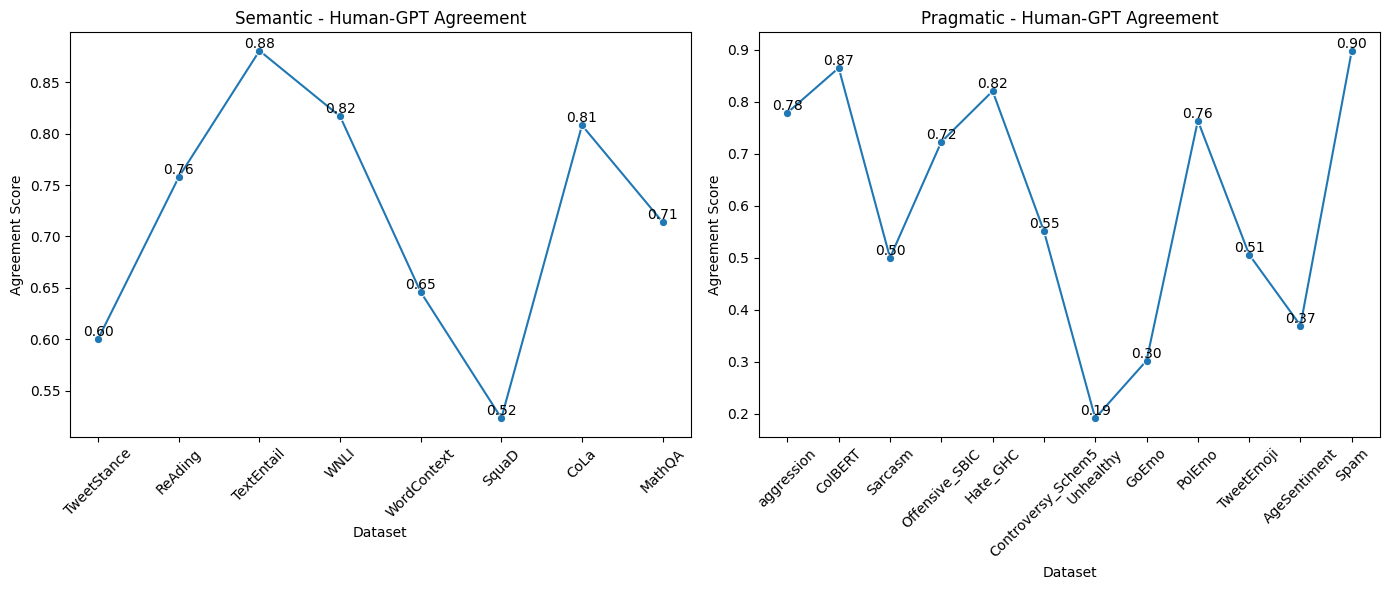

In [ ]:
# Filter the DataFrame for 'semantic' and 'pragmatic' tags
df_semantic = df[df['tag'] == 'semantic']
df_pragmatic = df[df['tag'] == 'pragmatic']

# Sorting if needed (assuming based on 'human_gpt_agreement' in descending order)
df_semantic_sorted = df_semantic.sort_values(by='GPT_order_summary', ascending=False)
df_pragmatic_sorted = df_pragmatic.sort_values(by='GPT_order_summary', ascending=False)

# Creating subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting 'semantic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_semantic_sorted, marker='o', ax=ax[0])
ax[0].set_title('Semantic - Human-GPT Agreement')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Agreement Score')
ax[0].tick_params(axis='x', rotation=45)

# Adding score text for semantic plot
for x, y in zip(df_semantic_sorted['dataset'], df_semantic_sorted['human_gpt_agreement']):
    ax[0].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Plotting 'pragmatic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_pragmatic_sorted, marker='o', ax=ax[1])
ax[1].set_title('Pragmatic - Human-GPT Agreement')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Agreement Score')
ax[1].tick_params(axis='x', rotation=45)

# Adding score text for pragmatic plot
for x, y in zip(df_pragmatic_sorted['dataset'], df_pragmatic_sorted['human_gpt_agreement']):
    ax[1].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

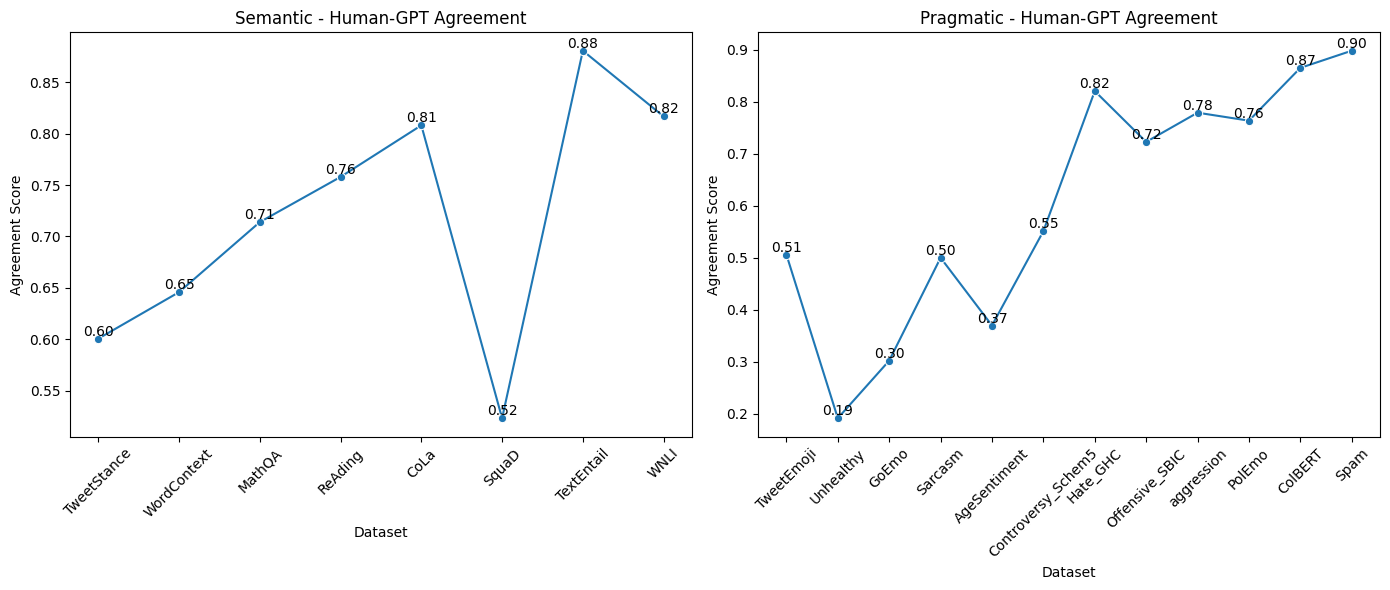

In [ ]:
# Filter the DataFrame for 'semantic' and 'pragmatic' tags
df_semantic = df[df['tag'] == 'semantic']
df_pragmatic = df[df['tag'] == 'pragmatic']

# Sorting if needed (assuming based on 'human_gpt_agreement' in descending order)
df_semantic_sorted = df_semantic.sort_values(by='Model_Task_difficulty', ascending=False)
df_pragmatic_sorted = df_pragmatic.sort_values(by='Model_Task_difficulty', ascending=False)

# Creating subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting 'semantic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_semantic_sorted, marker='o', ax=ax[0])
ax[0].set_title('Semantic - Human-GPT Agreement')
ax[0].set_xlabel('Dataset')
ax[0].set_ylabel('Agreement Score')
ax[0].tick_params(axis='x', rotation=45)

# Adding score text for semantic plot
for x, y in zip(df_semantic_sorted['dataset'], df_semantic_sorted['human_gpt_agreement']):
    ax[0].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Plotting 'pragmatic' data
sns.lineplot(x='dataset', y='human_gpt_agreement', data=df_pragmatic_sorted, marker='o', ax=ax[1])
ax[1].set_title('Pragmatic - Human-GPT Agreement')
ax[1].set_xlabel('Dataset')
ax[1].set_ylabel('Agreement Score')
ax[1].tick_params(axis='x', rotation=45)

# Adding score text for pragmatic plot
for x, y in zip(df_pragmatic_sorted['dataset'], df_pragmatic_sorted['human_gpt_agreement']):
    ax[1].text(x, y, format(y, '.2f'), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Sample data
# Replace these with your actual data
human_labels = ['aggressive', 'non-aggressive', 'aggressive', 'non-aggressive', 'aggressive']
gpt_labels = ['aggressive', 'aggressive', 'non-aggressive', 'non-aggressive', 'aggressive']

# Calculating Cohen's Kappa
kappa = cohen_kappa_score(human_labels, gpt_labels)

kappa

0.16666666666666663

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Sample data for multi-category classification
# Replace these with your actual data
human_labels = ['happy', 'disgust', 'angry', 'happy', 'sad']
gpt_labels = ['happy', 'disgust', 'disgust', 'angry', 'disapproval']

# Calculating Cohen's Kappa
kappa = cohen_kappa_score(human_labels, gpt_labels)

print(kappa)

0.25
